In [1]:
"""
Created on Mon Jan 20 15:50:49 2020

@author: nupur
"""
# data analysis and wrangling
import pandas as pd
import numpy as np
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

In [3]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [6]:
# description of data set
print("The train_df head: {} ".format(train_df.head()))
print("The train_df info: {} ".format(train_df.info()))
print("The test_df head: {} ".format(test_df.head()))
print("The test_df info: {} ".format(test_df.info()))
print("The train_df size: {} ".format(train_df.shape))
print("The test_df size: {} ".format(test_df.shape))

The train_df head:    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500 

In [7]:
#Analyze by pivoting features
print("Pivot by Pclass")
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print("Pivot by Sex")
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print("Pivot by Family")
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print("Pivot by Parch")
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pivot by Pclass
Pivot by Sex
Pivot by Family
Pivot by Parch


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


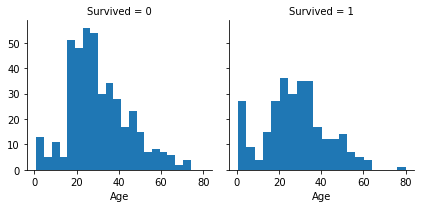

In [8]:
# Visual analysis 
#Survivor by  age
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

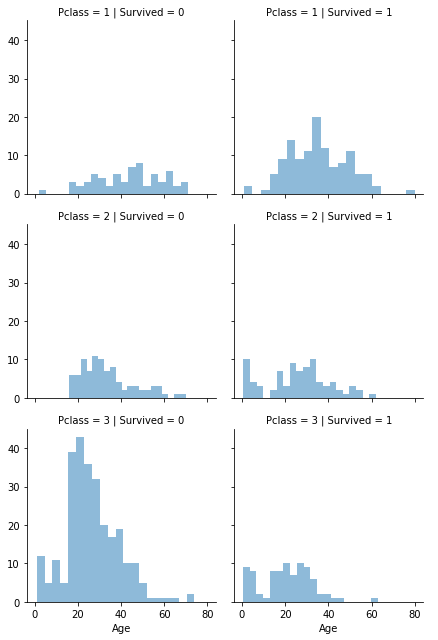

In [9]:
# Survivor by PClass
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

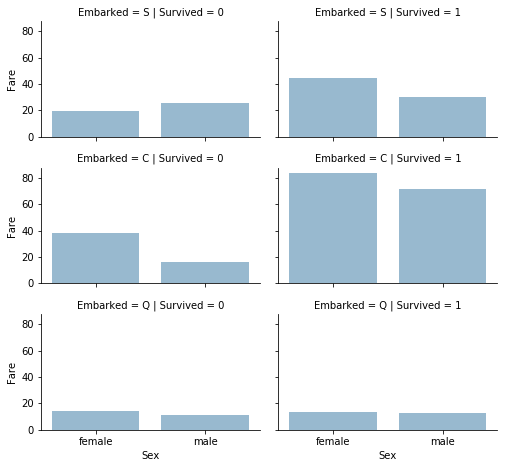

In [10]:
# Survivor by Embarked
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Titanic data clean up 

In [11]:
# Dropping Cabin and Tickets 
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)


In [12]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [13]:
print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

After (891, 10) (418, 9) (891, 10) (418, 9)


In [14]:
# Extracting title
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [15]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col',
 	'Don', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Mr')
    dataset['Title'] = dataset['Title'].replace('Lady', 'Ms')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Ms')
    dataset['Title'] = dataset['Title'].replace('Miss', 'Ms')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Ms')
    dataset['Title'] = dataset['Title'].replace('Countess', 'Ms')    
    dataset['Title'] = dataset['Title'].replace('Dona', 'Ms')  

In [16]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Dr,0.428571
1,Master,0.575000
2,Mr,0.158192
3,Mrs,0.792000
4,Ms,0.707447


In [17]:
title_mapping = {"Mr": 1, "Mrs": 2,"Master":3,'Ms':4,'Dr': 5}

In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [19]:
# Dropping passenger name
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 10), (418, 9))

In [20]:
# Changing sex to number
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [21]:
# Changing family details to number alone vs family
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [22]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [23]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [24]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [25]:
# dropping family details
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

In [26]:
# Changing Embarked details to number
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(train_df.Embarked.dropna().mode()[0])

In [27]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [28]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [29]:
# Replacing nan age with median Age
train_df['Age'].fillna(train_df['Age'].dropna().median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].dropna().median(), inplace=True)

In [30]:
# Replacing nan fare with median Fare
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [31]:
# changing fare in to four bands of very low, low, medium, high
train_df['FareBand'] = pd.qcut(train_df['Fare'], 2 , duplicates='drop')
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 14.454]",0.250559
1,"(14.454, 512.329]",0.518018


In [32]:
for dataset in combine:
    dataset.loc[(dataset['Fare'] <= 14.454), 'Fare'] = 0
    dataset.loc[ dataset['Fare'] > 14.454, 'Fare'] = 1
    dataset['Fare'] = dataset['Fare'].astype(int)

In [33]:
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
train_df.head(10)
print("Pivot by Fare")
train_df[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pivot by Fare


,Fare,Survived
1,1,0.512195
0,0,0.252273


In [34]:
n_folds = 5
kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train_df.values)

In [35]:
def cross_val_score_mean(model,y_i,x_i):
    cvs = cross_val_score(model,X=x_i,y=y_i,scoring ="accuracy",cv=kf)
    return (cvs.mean())

In [36]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

In [38]:
def confusion_matrix_pred(model,X_train, y_train):
    y_train_pred = cross_val_predict(model, X_train,y_train , cv=kf)
    print("Confusion matrix \n {}".format(confusion_matrix(y_train, y_train_pred)))
    print("Precision score: {:.2f}".format(precision_score(y_train, y_train_pred)))
    print("Recall score: {:.2f}".format(recall_score(y_train, y_train_pred)))
    print("F1 score: {:.2f}".format(f1_score(y_train, y_train_pred)))
    y_scores = [];
    if(type(model)!= GaussianNB):
        y_scores = cross_val_predict(model, X_train, y_train, cv=kf,method="decision_function")
        print("Precision and recall versus the decision threshold")
    else:
        y_scores = y_train_pred
        print("Precision and recall")
    
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    plt.show()
    fpr, tpr, thresholds = roc_curve(y_train, y_scores)
    print("ROC curve")
    plot_roc_curve(fpr, tpr)
    plt.show()
    print("roc_auc_score: {:.2f}".format(roc_auc_score(y_train, y_scores)))

In [39]:
X_train = train_df.drop(["Survived","PassengerId"], axis=1)
y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

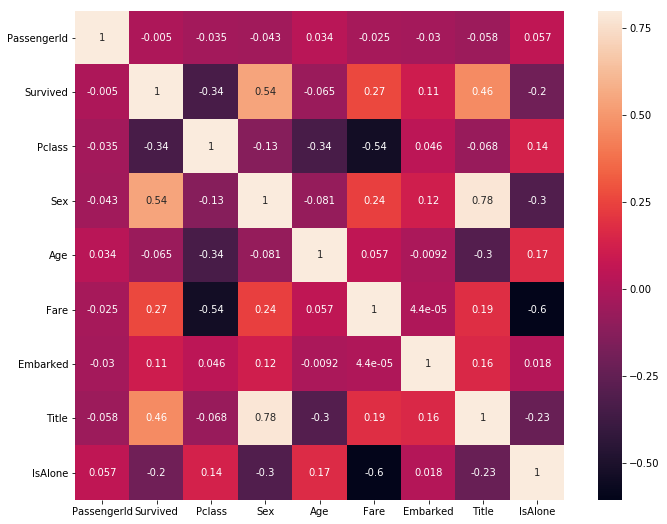

In [40]:
# heat map of variuos variables
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, cbar=True, annot=True, square=True);

----------Stats around Logistic regression-----------
----------Train score-----------
Training set score: 0.79
cross_val_score_mean: 0.783407080038315
Confusion matrix 
 [[469  80]
 [113 229]]
Precision score: 0.74
Recall score: 0.67
F1 score: 0.70
Precision and recall versus the decision threshold


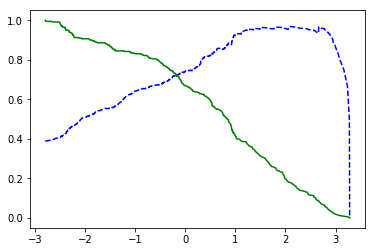

ROC curve


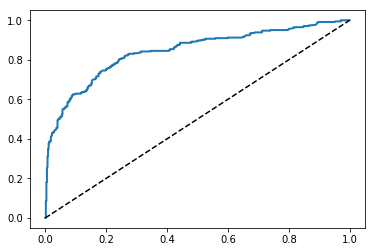

roc_auc_score: 0.84
----------Test score-----------
Test set score: 1.00
cross_val_score_mean 0.9642529782997536
Confusion matrix 
 [[268   3]
 [ 12 135]]
Precision score: 0.98
Recall score: 0.92
F1 score: 0.95
Precision and recall versus the decision threshold


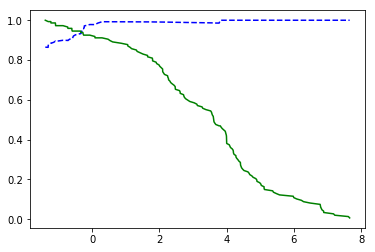

ROC curve


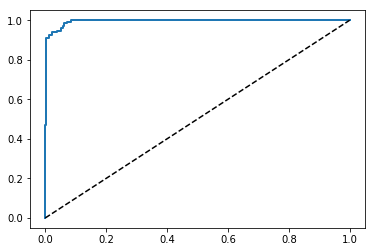

roc_auc_score: 0.99


In [41]:
# Logistic Regression
print("----------Stats around Logistic regression-----------")
logreg = LogisticRegression(random_state=24)
logreg.fit(X_train, y_train )
y_test = logreg.predict(X_test)
print("----------Train score-----------")
print("Training set score: {:.2f}".format(logreg.score(X_train, y_train)))
print('cross_val_score_mean:',cross_val_score_mean(logreg,y_train,X_train))
confusion_matrix_pred(logreg,X_train, y_train)
print("----------Test score-----------")
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))
print('cross_val_score_mean',cross_val_score_mean(logreg,y_test,X_test))
confusion_matrix_pred(logreg,X_test, y_test)

----------Stats around Gaussian Naive Bayes-----------
----------Train score-----------
Training set score: 0.79
cross_val_score_mean: 0.7744497013426901
Confusion matrix 
 [[442 107]
 [ 94 248]]
Precision score: 0.70
Recall score: 0.73
F1 score: 0.71
Precision and recall


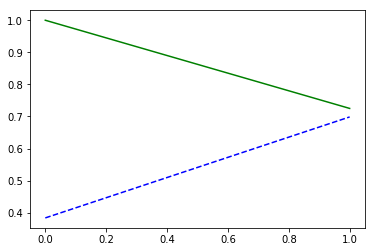

ROC curve


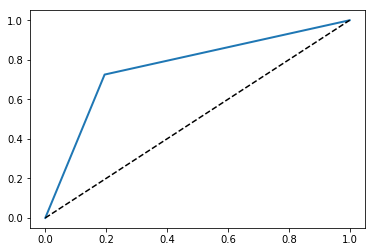

roc_auc_score: 0.77
----------Test score-----------
Test set score: 1.00
cross_val_score_mean: {:.2f} 0.952065404475043
Confusion matrix 
 [[255  16]
 [ 10 137]]
Precision score: 0.90
Recall score: 0.93
F1 score: 0.91
Precision and recall


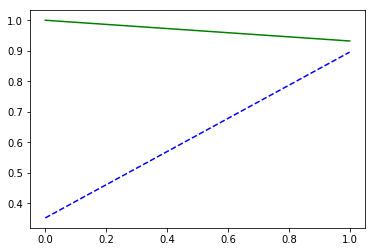

ROC curve


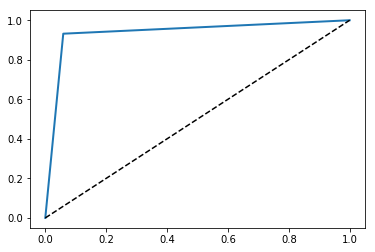

roc_auc_score: 0.94


In [42]:
# Gaussian Naive Bayes
print("----------Stats around Gaussian Naive Bayes-----------")
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
print("----------Train score-----------")
print("Training set score: {:.2f}".format(gaussian.score(X_train, y_train)))
print("cross_val_score_mean:",cross_val_score_mean(gaussian,y_train,X_train))
confusion_matrix_pred(gaussian,X_train, y_train)
print("----------Test score-----------")
print("Test set score: {:.2f}".format(gaussian.score(X_test, y_pred)))
print('cross_val_score_mean: {:.2f}',cross_val_score_mean(gaussian,y_pred,X_test))
confusion_matrix_pred(gaussian,X_test, y_test)

----------Stats around Stochastic Gradient Descent-----------
----------Train score-----------
Training set score: 0.71
cross_val_score_mean: 0.7508028443283127
Confusion matrix 
 [[453  96]
 [126 216]]
Precision score: 0.69
Recall score: 0.63
F1 score: 0.66
Precision and recall versus the decision threshold


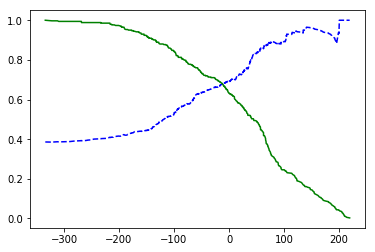

ROC curve


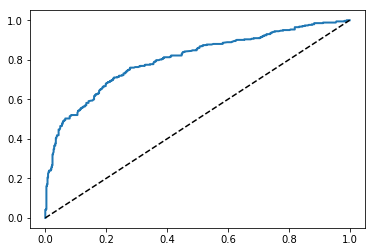

roc_auc_score: 0.80
----------Test score-----------
Test set score: 1.00
cross_val_score_means: {:.2f} 0.9423925667828106
Confusion matrix 
 [[218  53]
 [ 26 121]]
Precision score: 0.70
Recall score: 0.82
F1 score: 0.75
Precision and recall versus the decision threshold


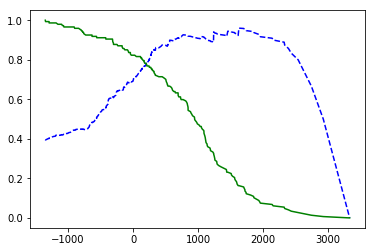

ROC curve


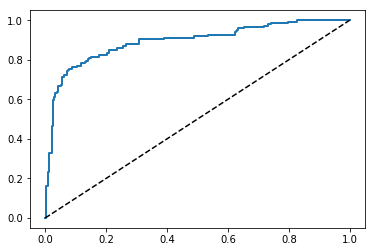

roc_auc_score: 0.89


In [43]:
# Stochastic Gradient Descent
print("----------Stats around Stochastic Gradient Descent-----------")
sgd = SGDClassifier(random_state=24)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print("----------Train score-----------")
print("Training set score: {:.2f}".format(sgd.score(X_train, y_train)))
print('cross_val_score_mean:',cross_val_score_mean(sgd,y_train,X_train))
confusion_matrix_pred(sgd,X_train, y_train)
print("----------Test score-----------")
print("Test set score: {:.2f}".format(sgd.score(X_test, y_pred)))
print('cross_val_score_means: {:.2f}',cross_val_score_mean(sgd,y_pred,X_test))
confusion_matrix_pred(sgd,X_test, y_test)